In [9]:
import os
import glob

import pandas as pd
import numpy as np

%matplotlib inline

In [10]:
from helpers import *

# Data prep

In [11]:
concept = 'cumulative_immigration_surplus_employed_aged_20_64'

In [12]:
df = pd.read_csv('../indata/supermappen/Tabell11D_Nettoflytt_MedArbBas.csv', encoding='latin1' , sep=';', decimal=',')

In [13]:
df = df.rename(columns={
    'Statistikår': 'year',
    'Basområde': 'BASKOD2010',
    'Nettoflytt': 'value'
})

In [14]:
df = baskod2010tobasomrade(df)#.drop(columns=['BASKOD2010', 'BASKOD2000'])

# Kumulativ summa

Kombinera nya data med gamla för att kunna räkna från senaste årets summa

In [15]:
df = appendNewDatapoints(concept, df, write=False)

Använd bara sista året i gamla tidsserien

In [16]:
df = df[df['year'] >= 2014]

Räkna kumulativ summa

In [17]:
df = df.groupby(['basomrade','year']).sum().groupby(level=[0]).cumsum().reset_index()

Endast data från nya tidsserien

In [18]:
df = df[df['year'] >= 2015]

# Export

In [19]:
combined = appendNewDatapoints(concept, df)

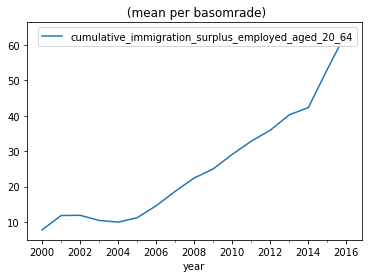

In [20]:
plotcombined(combined, 'cumulative_immigration_surplus_employed_aged_20_64')